In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore') 

# 1. Building IMDB Movie Data

## IMDb Datasets

Subsets of IMDb data are available for access to customers for personal and non-commercial use. You can hold local copies of this data, and it is subject to our terms and conditions. Please refer to the Non-Commercial Licensing and copyright/license and verify compliance.

## Data Location

The dataset files can be accessed and downloaded from https://datasets.imdbws.com/. The data is refreshed daily.

IMDb Dataset Details

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows:

#### title.akas.tsv.gz - Contains the following information for titles:

- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title

#### title.basics.tsv.gz - Contains the following information for titles:
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

#### title.crew.tsv.gz – Contains the director and writer information for all the titles in IMDb. Fields include:
- tconst (string) - alphanumeric unique identifier of the title
- directors (array of nconsts) - director(s) of the given title
- writers (array of nconsts) – writer(s) of the given title

#### title.episode.tsv.gz – Contains the tv episode information. Fields include:
- tconst (string) - alphanumeric identifier of episode
- parentTconst (string) - alphanumeric identifier of the parent TV Series
- seasonNumber (integer) – season number the episode belongs to
- episodeNumber (integer) – episode number of the tconst in the TV series
- title.principals.tsv.gz – Contains the principal cast/crew for titles
- tconst (string) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\N'
- characters (string) - the name of the character played if applicable, else '\N'

#### title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

#### name.basics.tsv.gz – Contains the following information for names:
- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

### 1) Data from Kaggle

https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+title_principals.csv

#### Acknowledgements
- Data has been scraped from the publicly available website https://www.imdb.com.
- All the movies with more than 100 votes, movie runtime over 40min
- Data was scrapped on 2020/01

In [2]:
# data scrapped 202001
ratings_202001 = pd.read_csv("IMDb_ratings_202001.csv")
names_202001 = pd.read_csv("IMDb_movies_202001.csv")

C:\Users\kjkoo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
names_202001.shape

(85855, 22)

In [4]:
ratings_202001.shape

(85855, 49)

In [6]:
imdb_data_merge_202001 = pd.merge(names_202001,ratings_202001,on='imdb_title_id')
imdb_data_merge_202001.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [17]:
# Extract the only columns what we will use

imdb_data_202001 = imdb_data_merge_202001[['imdb_title_id','title','original_title','year','date_published','genre','duration','country',
                'language','director','writer','production_company','actors','description','avg_vote','votes',
                'budget','worlwide_gross_income',]].copy()
imdb_data_202001.drop_duplicates(subset='imdb_title_id',inplace=True)
imdb_data_202001

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,worlwide_gross_income
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,$ 3507171
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,$ 7299062
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,$ 2833


In [9]:
imdb_data_202001.to_csv("imdb_data_202001.csv", index=False, encoding='UTF-8')

### 2) Directly scrap data from IMdb

#### Acknowledgements
- Data has been scraped from the publicly available website https://www.imdb.com.
- All the movies with more than 100 votes, movie runtime over 40min
- This data scraped on 10/16/2020.

In [40]:
# Data scrapped 202110
name= pd.read_csv('IMDB_movies_20211015/data.tsv', header=0, sep='\t', quotechar='"', error_bad_lines=False, encoding='UTF-8')
ratings= pd.read_csv('IMDB_ratings_20211015/data.tsv', header=0, sep='\t', quotechar='"', error_bad_lines=False, encoding='UTF-8')
basic= pd.read_csv('IMDB_movies_20211015/basic.tsv', header=0, sep='\t', quotechar='"', error_bad_lines=False, encoding='UTF-8')

In [4]:
# Remain the title which is order 1
name_202110 = name[name['ordering'] == 1]

# Extract the columns what we need
name_202110 = name_202110[['titleId','title','region','language']]
name_202110

,titleId,title,region,language
0,tt0000001,Карменсіта,UA,\N
8,tt0000002,Le clown et ses chiens,\N,\N
16,tt0000003,Sarmanul Pierrot,RO,\N
25,tt0000004,Un bon bock,\N,\N
35,tt0000005,Blacksmithing Scene,US,\N
...,...,...,...,...
29468705,tt9916846,Épisode #3.18,FR,fr
29468712,tt9916848,Épisode #3.17,FR,fr
29468719,tt9916850,Episódio #3.19,PT,pt
29468726,tt9916852,Episodio #3.20,ES,es


In [5]:
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1827
1,tt0000002,6.0,233
2,tt0000003,6.5,1581
3,tt0000004,6.1,151
4,tt0000005,6.2,2404
...,...,...,...
1194535,tt9916682,5.6,5
1194536,tt9916690,6.6,5
1194537,tt9916720,5.3,139
1194538,tt9916766,7.1,17


In [6]:
# sort the movie more than 100 votes

ratings_202110 = ratings[ratings['numVotes'] >= 100]
ratings_202110

,tconst,averageRating,numVotes
0,tt0000001,5.7,1827
1,tt0000002,6.0,233
2,tt0000003,6.5,1581
3,tt0000004,6.1,151
4,tt0000005,6.2,2404
...,...,...,...
1194517,tt9916204,8.2,218
1194520,tt9916270,5.8,1192
1194523,tt9916362,6.4,3974
1194524,tt9916380,8.9,106


In [38]:
basic

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8357579,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8357580,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8357581,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8357582,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [54]:
# Extract the columns we only need from basic dataset, extract only movie, sort moveis runtime over 40, exclude short movie
basic_202110 = basic[['tconst', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 
                             'runtimeMinutes','genres']][basic['titleType'].str.contains('movie|tvMovie')]

# change some error data of runtime to 0
import re

def extract_num(w):
    w = w.strip()
    w = re.sub(r"[^0-9]+", '0', w)
    w = w.strip()
    return w

basic_202110['runtimeMinutes'] = basic_202110['runtimeMinutes'].apply(extract_num)
basic_202110 = basic_202110[basic_202110['runtimeMinutes'].astype('int') > 40]

basic_202110 = basic_202110[basic_202110['genres'].notnull()] # drop the null value from gerne column
basic_202110 = basic_202110[basic_202110['genres'] != "\\N"]
basic_202110 = basic_202110[~basic_202110['genres'].str.contains('Short')]

basic_202110

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
1172,tt0001184,Don Juan de Serrallonga,Don Juan de Serrallonga,0,1910,58,"Adventure,Drama"
1246,tt0001258,The White Slave Trade,Den hvide slavehandel,0,1910,45,Drama
...,...,...,...,...,...,...,...
8357443,tt9916560,March of Dimes Presents: Once Upon a Dime,March of Dimes Presents: Once Upon a Dime,0,1963,58,Family
8357473,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary
8357500,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary
8357505,tt9916692,Teatroteka: Czlowiek bez twarzy,Teatroteka: Czlowiek bez twarzy,0,2015,66,Drama


In [55]:
# Untie the name of key columns 

name_202110.rename(columns={'titleId':'imdb_title_id'},inplace=True)
ratings_202110.rename(columns={'tconst':'imdb_title_id'},inplace=True)
basic_202110.rename(columns={'tconst':'imdb_title_id'},inplace=True)

C:\Users\kjkoo\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [56]:
# name + basic

merge_1 = pd.merge(name_202110, basic_202110, how = 'right', on = 'imdb_title_id')
merge_1

,imdb_title_id,title,region,language,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000574,Kelly bandájának története,HU,\N,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
1,tt0000591,L'enfant prodigue,FR,\N,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
2,tt0000679,The Fairylogue and Radio-Plays,\N,\N,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
3,tt0001184,Don Juan de Serrallonga,\N,\N,Don Juan de Serrallonga,Don Juan de Serrallonga,0,1910,58,"Adventure,Drama"
4,tt0001258,Valkoinen orjakauppa,FI,\N,The White Slave Trade,Den hvide slavehandel,0,1910,45,Drama
...,...,...,...,...,...,...,...,...,...,...
419755,tt9916560,March of Dimes Presents: Once Upon a Dime,US,\N,March of Dimes Presents: Once Upon a Dime,March of Dimes Presents: Once Upon a Dime,0,1963,58,Family
419756,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,BR,\N,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary
419757,tt9916680,De la ilusión al desconcierto: cine colombiano...,CO,\N,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary
419758,tt9916692,Teatroteka: Czlowiek bez twarzy,PL,\N,Teatroteka: Czlowiek bez twarzy,Teatroteka: Czlowiek bez twarzy,0,2015,66,Drama


In [79]:
# name + basic + rating

merge_2 = pd.merge(ratings_202110, merge_1,how='right', on = 'imdb_title_id')
merge_2

,imdb_title_id,averageRating,numVotes,title,region,language,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000574,6.1,698.0,Kelly bandájának története,HU,\N,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
1,tt0000591,NaN,NaN,L'enfant prodigue,FR,\N,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
2,tt0000679,NaN,NaN,The Fairylogue and Radio-Plays,\N,\N,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
3,tt0001184,NaN,NaN,Don Juan de Serrallonga,\N,\N,Don Juan de Serrallonga,Don Juan de Serrallonga,0,1910,58,"Adventure,Drama"
4,tt0001258,5.7,132.0,Valkoinen orjakauppa,FI,\N,The White Slave Trade,Den hvide slavehandel,0,1910,45,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
419755,tt9916560,NaN,NaN,March of Dimes Presents: Once Upon a Dime,US,\N,March of Dimes Presents: Once Upon a Dime,March of Dimes Presents: Once Upon a Dime,0,1963,58,Family
419756,tt9916622,NaN,NaN,Rodolpho Teóphilo - O Legado de um Pioneiro,BR,\N,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary
419757,tt9916680,NaN,NaN,De la ilusión al desconcierto: cine colombiano...,CO,\N,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary
419758,tt9916692,NaN,NaN,Teatroteka: Czlowiek bez twarzy,PL,\N,Teatroteka: Czlowiek bez twarzy,Teatroteka: Czlowiek bez twarzy,0,2015,66,Drama


imdb_title_id          0
averageRating     301889
numVotes          301889
title               1030
region              1043
language            1030
primaryTitle           0
originalTitle          0
isAdult                0
startYear              0
runtimeMinutes         0
genres                 0
dtype: int64

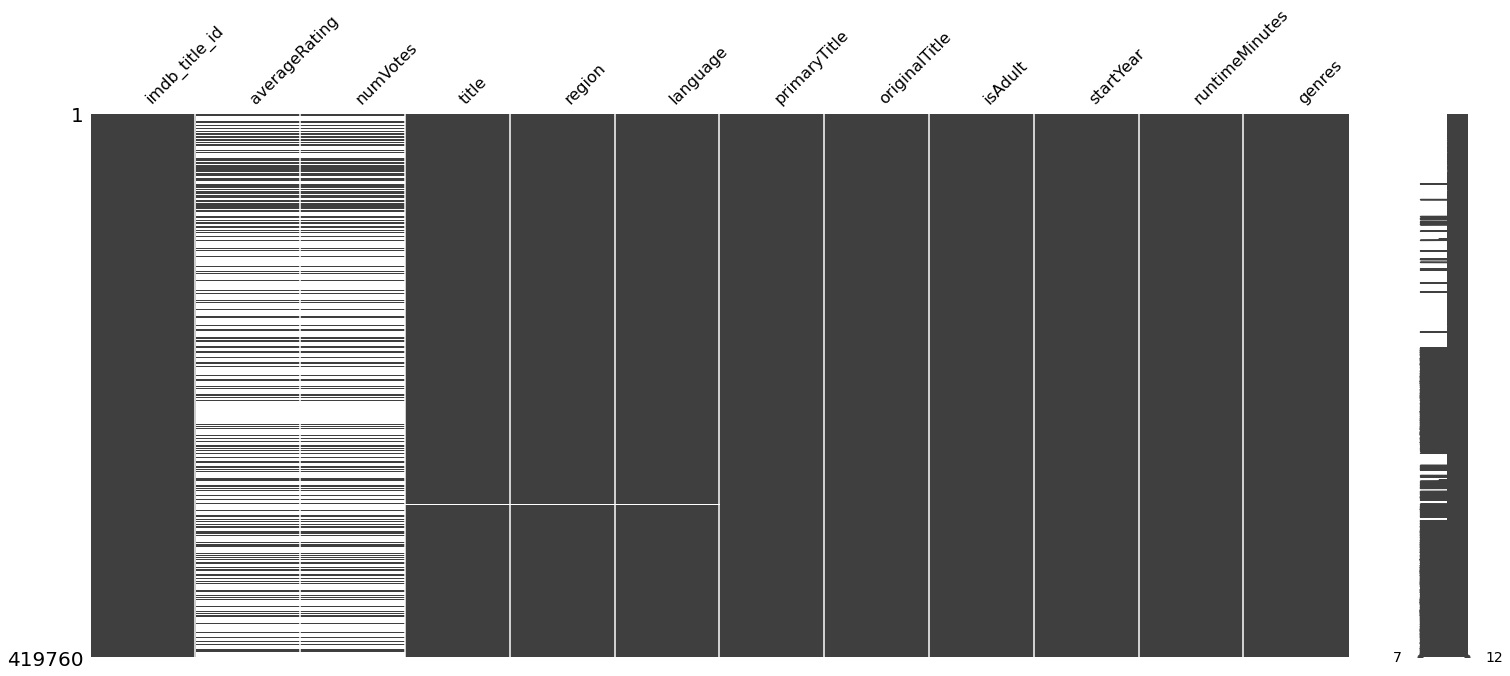

In [80]:
# check the missing value
import missingno as msno
msno.matrix(merge_2)
merge_2.isnull().sum()

In [109]:
# delete the missing value change the value "\N" to unkonw
import re

merge_process = merge_2.dropna(axis=0)

#
inputToken = '\\N'
merge_process['region'] = merge_process['region'].str.replace(re.escape(inputToken), "Unknown")
merge_process['language'] = merge_process['language'].str.replace(re.escape(inputToken), "Unknown")
merge_process

,imdb_title_id,averageRating,numVotes,title,region,language,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000574,6.1,698.0,Kelly bandájának története,HU,Unknown,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
4,tt0001258,5.7,132.0,Valkoinen orjakauppa,FI,Unknown,The White Slave Trade,Den hvide slavehandel,0,1910,45,Drama
10,tt0001892,5.9,214.0,A fekete álom,HU,Unknown,Den sorte drøm,Den sorte drøm,0,1911,53,Drama
14,tt0002101,5.1,520.0,Cleopatra,Unknown,Unknown,Cleopatra,Cleopatra,0,1912,100,"Drama,History"
15,tt0002130,7.0,2675.0,L'inferno,IT,Unknown,Dante's Inferno,L'Inferno,0,1911,71,"Adventure,Drama,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
419728,tt9914286,7.6,218.0,Sokagin Çocuklari,TR,Unknown,Sokagin Çocuklari,Sokagin Çocuklari,0,2019,98,"Drama,Family"
419737,tt9914942,6.8,134.0,La vida sense la Sara Amat,Unknown,Unknown,Life Without Sara Amat,La vida sense la Sara Amat,0,2019,74,Drama
419750,tt9916190,3.5,225.0,Safeguard,DE,Unknown,Safeguard,Safeguard,0,2020,90,"Action,Adventure,Thriller"
419752,tt9916270,5.8,1192.0,Il talento del calabrone,IT,Unknown,Il talento del calabrone,Il talento del calabrone,0,2020,84,Thriller


<AxesSubplot:>

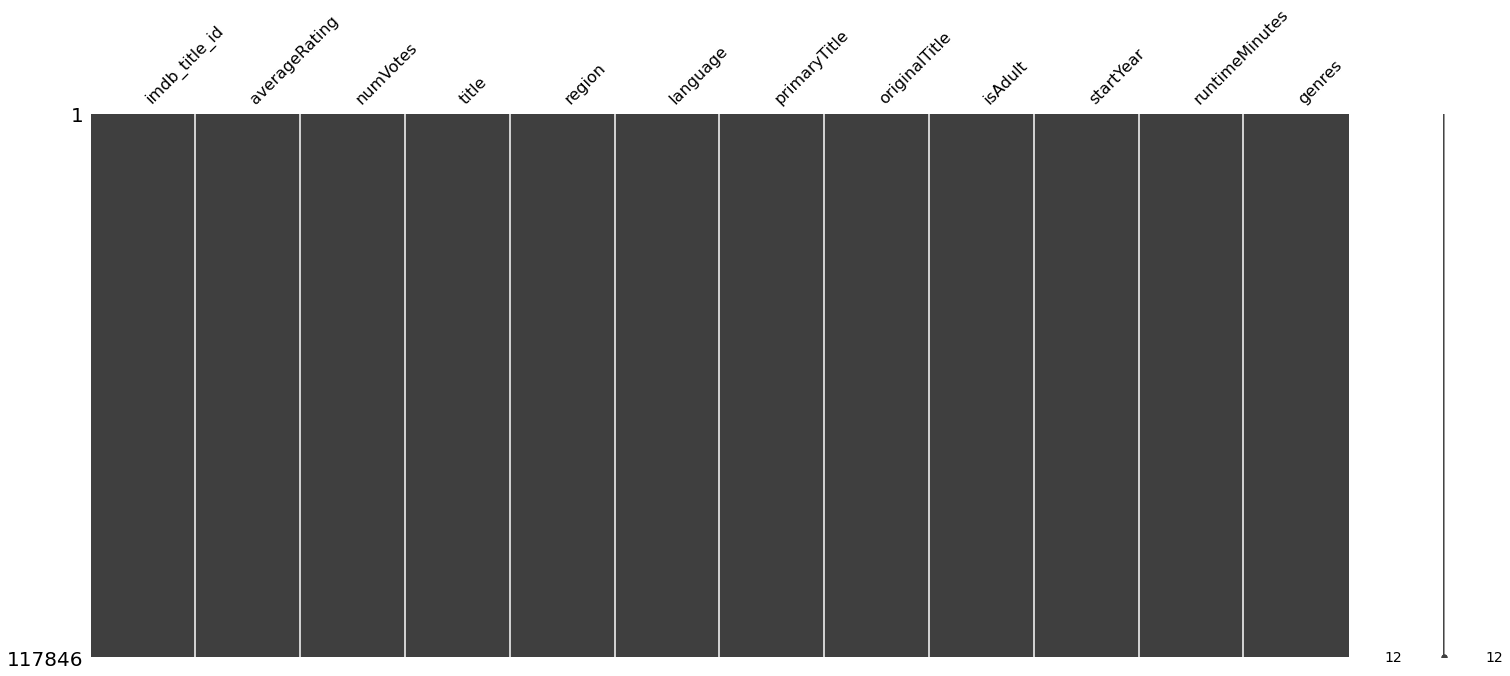

In [90]:
msno.matrix(merge_process)

In [123]:
# save the metadata of imdb

merge_process.to_csv("imdb_data_202110.csv", index=False, encoding='utf-8')

## Combining data of 202001, 202110 to build the final meta dataset

#### Condition of data

- We use movie data votes > 100

In [94]:
imdb_data_202001 = pd.read_csv('imdb_data_202001.csv')
imdb_data_202001

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,worlwide_gross_income
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,$ 3507171
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,$ 7299062
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,$ 2833


In [136]:
imdb_data_202110 = pd.read_csv("imdb_data_202110.csv")
imdb_data_202110

,imdb_title_id,averageRating,numVotes,title,region,language,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000574,6.1,698.0,Kelly bandájának története,HU,Unknown,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
1,tt0001258,5.7,132.0,Valkoinen orjakauppa,FI,Unknown,The White Slave Trade,Den hvide slavehandel,0,1910,45,Drama
2,tt0001892,5.9,214.0,A fekete álom,HU,Unknown,Den sorte drøm,Den sorte drøm,0,1911,53,Drama
3,tt0002101,5.1,520.0,Cleopatra,Unknown,Unknown,Cleopatra,Cleopatra,0,1912,100,"Drama,History"
4,tt0002130,7.0,2675.0,L'inferno,IT,Unknown,Dante's Inferno,L'Inferno,0,1911,71,"Adventure,Drama,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,7.6,218.0,Sokagin Çocuklari,TR,Unknown,Sokagin Çocuklari,Sokagin Çocuklari,0,2019,98,"Drama,Family"
117842,tt9914942,6.8,134.0,La vida sense la Sara Amat,Unknown,Unknown,Life Without Sara Amat,La vida sense la Sara Amat,0,2019,74,Drama
117843,tt9916190,3.5,225.0,Safeguard,DE,Unknown,Safeguard,Safeguard,0,2020,90,"Action,Adventure,Thriller"
117844,tt9916270,5.8,1192.0,Il talento del calabrone,IT,Unknown,Il talento del calabrone,Il talento del calabrone,0,2020,84,Thriller


In [96]:
imdb_combined_data = pd.merge(imdb_data_202001,imdb_data_202110, on='imdb_title_id', how='right', 
                              suffixes=('_202001','_202110'))
imdb_combined_data

,imdb_title_id,title_202001,original_title,year,date_published,genre,duration,country,language_202001,director,...,numVotes,title_202110,region,language_202110,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70.0,Australia,None,Charles Tait,...,698.0,Kelly bandájának története,HU,Unknown,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
1,tt0001258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,132.0,Valkoinen orjakauppa,FI,Unknown,The White Slave Trade,Den hvide slavehandel,0,1910,45,Drama
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53.0,"Germany, Denmark",NaN,Urban Gad,...,214.0,A fekete álom,HU,Unknown,Den sorte drøm,Den sorte drøm,0,1911,53,Drama
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100.0,USA,English,Charles L. Gaskill,...,520.0,Cleopatra,Unknown,Unknown,Cleopatra,Cleopatra,0,1912,100,"Drama,History"
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68.0,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,2675.0,L'inferno,IT,Unknown,Dante's Inferno,L'Inferno,0,1911,71,"Adventure,Drama,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98.0,Turkey,Turkish,Ahmet Faik Akinci,...,218.0,Sokagin Çocuklari,TR,Unknown,Sokagin Çocuklari,Sokagin Çocuklari,0,2019,98,"Drama,Family"
117842,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74.0,Spain,Catalan,Laura Jou,...,134.0,La vida sense la Sara Amat,Unknown,Unknown,Life Without Sara Amat,La vida sense la Sara Amat,0,2019,74,Drama
117843,tt9916190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,225.0,Safeguard,DE,Unknown,Safeguard,Safeguard,0,2020,90,"Action,Adventure,Thriller"
117844,tt9916270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1192.0,Il talento del calabrone,IT,Unknown,Il talento del calabrone,Il talento del calabrone,0,2020,84,Thriller


In [139]:
# check the columns and extract what we want


imdb_combined_data = imdb_combined_data[['imdb_title_id','primaryTitle','startYear','region','language_202110','genres',
                   'runtimeMinutes','isAdult','budget','worlwide_gross_income','avg_vote','averageRating',
                   'votes','numVotes']]
imdb_combined_data.columns = ['imdb_title_id','title','release_year','country','language','genres',
                   'runtime_min','isAdult','budget','gross_income','rating_2019','rating_2021',
                   'num_votes_2019','num_votes_2021']
imdb_combined_data

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,gross_income,rating_2019,rating_2021,num_votes_2019,num_votes_2021
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,NaN,6.1,6.1,589.0,698.0
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,NaN,NaN,5.7,NaN,132.0
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,NaN,5.8,5.9,188.0,214.0
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,NaN,5.2,5.1,446.0,520.0
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,NaN,7.0,7.0,2237.0,2675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,Sokagin Çocuklari,2019,TR,Unknown,"Drama,Family",98,0,NaN,$ 2833,6.4,7.6,194.0,218.0
117842,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,$ 59794,6.7,6.8,102.0,134.0
117843,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,NaN,NaN,3.5,NaN,225.0
117844,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,NaN,NaN,5.8,NaN,1192.0


In [140]:
# save combined data

imdb_combined_data.to_csv("imdb_combined_data.csv",index=False, encoding='utf-8')

## Update 1) Crew name dataset

- I found that I have to add the key of directors, stars to combine it with another sources
- We will combine the key of directors and stars with the dataset of quntitative for directors and stars

In [141]:
# add crew name

# key of crews
crews_202110 = pd.read_csv('IMDB_movies_20211015/crew.tsv', header=0, sep='\t', quotechar='"', error_bad_lines=False, encoding='UTF-8')

#name of crews
crew_names_202110 = pd.read_csv('IMDB_movies_20211015/name.tsv', header=0, sep='\t', quotechar='"', error_bad_lines=False, encoding='UTF-8')

In [142]:
# make a name of actor

actor_202110 = pd.read_csv('IMDB_movies_20211015/cast.tsv', header=0, sep='\t', quotechar='"', error_bad_lines=False, encoding='UTF-8')
actor_202110

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
47274790,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]"
47274791,tt9916880,5,nm0996406,director,principal director,\N
47274792,tt9916880,6,nm1482639,writer,\N,\N
47274793,tt9916880,7,nm2586970,writer,books,\N


In [143]:
actor_202110['category'].unique()

array(['self', 'director', 'cinematographer', 'composer', 'producer',
       'editor', 'actor', 'actress', 'writer', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [144]:
actor_202110 = actor_202110[actor_202110['category'].isin(['actor','actress'])]
actor_202110.head()

,tconst,ordering,nconst,category,job,characters
11,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]"
12,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]"
16,tt0000007,1,nm0179163,actor,\N,\N
17,tt0000007,2,nm0183947,actor,\N,\N
21,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]"


In [145]:
# make actor list on one cell

actor_202110 = actor_202110.groupby(['tconst'])['nconst'].apply(lambda x: ','.join(x)).reset_index()
actor_202110

,tconst,nconst
0,tt0000005,"nm0443482,nm0653042"
1,tt0000007,"nm0179163,nm0183947"
2,tt0000008,nm0653028
3,tt0000009,"nm0063086,nm0183823,nm1309758"
4,tt0000011,nm3692297
...,...,...
4685219,tt9916848,"nm5519557,nm8825009,nm5262613,nm8690065"
4685220,tt9916850,"nm5519557,nm8825009,nm5262613,nm8690065"
4685221,tt9916852,"nm5519557,nm8825009,nm5262613,nm8690065"
4685222,tt9916856,"nm3394271,nm10538650,nm10538646,nm10538647"


In [146]:
# crew + actor

all_crew = pd.merge(crews_202110, actor_202110)
all_crew = all_crew[['tconst','directors','nconst']]
all_crew

,tconst,directors,nconst
0,tt0000005,nm0005690,"nm0443482,nm0653042"
1,tt0000007,"nm0374658,nm0005690","nm0179163,nm0183947"
2,tt0000008,nm0005690,nm0653028
3,tt0000009,nm0085156,"nm0063086,nm0183823,nm1309758"
4,tt0000011,nm0804434,nm3692297
...,...,...,...
4685129,tt9916848,"nm5519454,nm5519375","nm5519557,nm8825009,nm5262613,nm8690065"
4685130,tt9916850,"nm5519454,nm5519375","nm5519557,nm8825009,nm5262613,nm8690065"
4685131,tt9916852,"nm5519375,nm5519454","nm5519557,nm8825009,nm5262613,nm8690065"
4685132,tt9916856,nm10538645,"nm3394271,nm10538650,nm10538646,nm10538647"


In [147]:
# get at most 2 dircetors, 4 stars -> split each columns 

all_crew['directors_1'] = all_crew['directors'].str.split(',').str[0]
all_crew['directors_2'] = all_crew['directors'].str.split(',').str[1]
all_crew['star_1'] = all_crew['nconst'].str.split(',').str[0]
all_crew['star_2'] = all_crew['nconst'].str.split(',').str[1]
all_crew['star_3'] = all_crew['nconst'].str.split(',').str[2]
all_crew['star_4'] = all_crew['nconst'].str.split(',').str[3]

In [148]:
all_crew

,tconst,directors,nconst,directors_1,directors_2,star_1,star_2,star_3,star_4
0,tt0000005,nm0005690,"nm0443482,nm0653042",nm0005690,NaN,nm0443482,nm0653042,NaN,NaN
1,tt0000007,"nm0374658,nm0005690","nm0179163,nm0183947",nm0374658,nm0005690,nm0179163,nm0183947,NaN,NaN
2,tt0000008,nm0005690,nm0653028,nm0005690,NaN,nm0653028,NaN,NaN,NaN
3,tt0000009,nm0085156,"nm0063086,nm0183823,nm1309758",nm0085156,NaN,nm0063086,nm0183823,nm1309758,NaN
4,tt0000011,nm0804434,nm3692297,nm0804434,NaN,nm3692297,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4685129,tt9916848,"nm5519454,nm5519375","nm5519557,nm8825009,nm5262613,nm8690065",nm5519454,nm5519375,nm5519557,nm8825009,nm5262613,nm8690065
4685130,tt9916850,"nm5519454,nm5519375","nm5519557,nm8825009,nm5262613,nm8690065",nm5519454,nm5519375,nm5519557,nm8825009,nm5262613,nm8690065
4685131,tt9916852,"nm5519375,nm5519454","nm5519557,nm8825009,nm5262613,nm8690065",nm5519375,nm5519454,nm5519557,nm8825009,nm5262613,nm8690065
4685132,tt9916856,nm10538645,"nm3394271,nm10538650,nm10538646,nm10538647",nm10538645,NaN,nm3394271,nm10538650,nm10538646,nm10538647


In [152]:
# Work only with the combined dataset for faster working

imdb_combined_data = pd.read_csv("Fin_dataset/imdb_combined_data.csv")

selceted_crew = pd.merge(imdb_combined_data,all_crew, left_on='imdb_title_id', right_on='tconst', how='left')
selceted_crew
selceted_crew = selceted_crew[['imdb_title_id', 'directors_1','directors_2','star_1','star_2','star_3','star_4']]
selceted_crew

,imdb_title_id,directors_1,directors_2,star_1,star_2,star_3,star_4
0,tt0000574,nm0846879,NaN,nm0846887,nm0846894,nm3002376,nm0170118
1,tt0001258,nm0088881,NaN,nm2528881,nm1993094,nm1458507,nm2112876
2,tt0001892,nm0300487,NaN,nm2325688,nm0003425,nm0699637,nm0375839
3,tt0002101,nm0309130,NaN,nm0906610,nm0306947,nm0801774,nm0276160
4,tt0002130,nm0655824,nm0078205,nm0660139,nm0685283,nm0209738,nm3942815
...,...,...,...,...,...,...,...
117841,tt9914286,nm1832009,NaN,nm1832009,nm7659571,nm2456249,nm10569025
117842,tt9914942,nm1716653,NaN,nm10814833,nm10823679,nm1290838,nm5580678
117843,tt9916190,nm7308376,NaN,nm0302466,nm8383131,nm2018573,nm7477011
117844,tt9916270,nm1480867,NaN,nm0144812,nm3080119,nm2063290,nm9428255


In [153]:
# Match the name of crew and key of crew

crew_names_202110 = crew_names_202110[['nconst','primaryName']]

name_1 = pd.merge(selceted_crew, crew_names_202110, how='left', left_on='directors_1', right_on='nconst')
name_1.rename(columns = {"primaryName":"director_1_name"},inplace=True)

name_2 = pd.merge(name_1, crew_names_202110,how='left', left_on='directors_2', right_on='nconst')
name_2.rename(columns = {"primaryName":"director_2_name"},inplace=True)

name_3 = pd.merge(name_2, crew_names_202110,how='left', left_on='star_1', right_on='nconst')
name_3.rename(columns = {"primaryName":"star_1_name"},inplace=True)

name_4 = pd.merge(name_3, crew_names_202110,how='left', left_on='star_2', right_on='nconst')
name_4.rename(columns = {"primaryName":"star_2_name"},inplace=True)

name_5 = pd.merge(name_4, crew_names_202110,how='left', left_on='star_3', right_on='nconst')
name_5.rename(columns = {"primaryName":"star_3_name"},inplace=True)

sleceted_crew_name = pd.merge(name_5, crew_names_202110,how='left', left_on='star_4', right_on='nconst')
sleceted_crew_name.rename(columns = {"primaryName":"star_4_name"},inplace=True)

sleceted_crew_name

,imdb_title_id,directors_1,directors_2,star_1,star_2,star_3,star_4,nconst_x,director_1_name,nconst_y,director_2_name,nconst_x,star_1_name,nconst_y,star_2_name,nconst_x,star_3_name,nconst_y,star_4_name
0,tt0000574,nm0846879,NaN,nm0846887,nm0846894,nm3002376,nm0170118,nm0846879,Charles Tait,NaN,NaN,nm0846887,Elizabeth Tait,nm0846894,John Tait,nm3002376,Norman Campbell,nm0170118,Bella Cola
1,tt0001258,nm0088881,NaN,nm2528881,nm1993094,nm1458507,nm2112876,nm0088881,August Blom,NaN,NaN,nm2528881,Aage Lorentzen,nm1993094,Ellen Diedrich,nm1458507,Victor Fabian,nm2112876,Julie Henriksen
2,tt0001892,nm0300487,NaN,nm2325688,nm0003425,nm0699637,nm0375839,nm0300487,Urban Gad,NaN,NaN,nm2325688,Mary Hagen,nm0003425,Asta Nielsen,nm0699637,Valdemar Psilander,nm0375839,Gunnar Helsengreen
3,tt0002101,nm0309130,NaN,nm0906610,nm0306947,nm0801774,nm0276160,nm0309130,Charles L. Gaskill,NaN,NaN,nm0906610,James R. Waite,nm0306947,Helen Gardner,nm0801774,Pearl Sindelar,nm0276160,Miss Fielding
4,tt0002130,nm0655824,nm0078205,nm0660139,nm0685283,nm0209738,nm3942815,nm0655824,Adolfo Padovan,nm0078205,Francesco Bertolini,nm0660139,Salvatore Papa,nm0685283,Arturo Pirovano,nm0209738,Giuseppe de Liguoro,nm3942815,Pier Delle Vigne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,nm1832009,NaN,nm1832009,nm7659571,nm2456249,nm10569025,nm1832009,Ahmet Faik Akinci,NaN,NaN,nm1832009,Ahmet Faik Akinci,nm7659571,Belma Mamati,nm2456249,Metin Keçeci,nm10569025,Burhan Sirmabiyik
117842,tt9914942,nm1716653,NaN,nm10814833,nm10823679,nm1290838,nm5580678,nm1716653,Laura Jou,NaN,NaN,nm10814833,Maria Morera Colomer,nm10823679,Biel Rossell Pelfort,nm1290838,Isaac Alcayde,nm5580678,Lluís Altés
117843,tt9916190,nm7308376,NaN,nm0302466,nm8383131,nm2018573,nm7477011,nm7308376,Fraser Precious,NaN,NaN,nm0302466,Patrick Gallagher,nm8383131,Lee Byford,nm2018573,Sean Cronin,nm7477011,Andrei Nova
117844,tt9916270,nm1480867,NaN,nm0144812,nm3080119,nm2063290,nm9428255,nm1480867,Giacomo Cimini,NaN,NaN,nm0144812,Sergio Castellitto,nm3080119,Lorenzo Richelmy,nm2063290,Anna Foglietta,nm9428255,Marina Occhionero


In [155]:
sleceted_crew_name = sleceted_crew_name[['imdb_title_id',"directors_1",'director_1_name','directors_2','director_2_name',
                   'star_1','star_1_name','star_2','star_2_name','star_3','star_3_name','star_4','star_4_name']]
sleceted_crew_name

,imdb_title_id,directors_1,director_1_name,directors_2,director_2_name,star_1,star_1_name,star_2,star_2_name,star_3,star_3_name,star_4,star_4_name
0,tt0000574,nm0846879,Charles Tait,NaN,NaN,nm0846887,Elizabeth Tait,nm0846894,John Tait,nm3002376,Norman Campbell,nm0170118,Bella Cola
1,tt0001258,nm0088881,August Blom,NaN,NaN,nm2528881,Aage Lorentzen,nm1993094,Ellen Diedrich,nm1458507,Victor Fabian,nm2112876,Julie Henriksen
2,tt0001892,nm0300487,Urban Gad,NaN,NaN,nm2325688,Mary Hagen,nm0003425,Asta Nielsen,nm0699637,Valdemar Psilander,nm0375839,Gunnar Helsengreen
3,tt0002101,nm0309130,Charles L. Gaskill,NaN,NaN,nm0906610,James R. Waite,nm0306947,Helen Gardner,nm0801774,Pearl Sindelar,nm0276160,Miss Fielding
4,tt0002130,nm0655824,Adolfo Padovan,nm0078205,Francesco Bertolini,nm0660139,Salvatore Papa,nm0685283,Arturo Pirovano,nm0209738,Giuseppe de Liguoro,nm3942815,Pier Delle Vigne
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,nm1832009,Ahmet Faik Akinci,NaN,NaN,nm1832009,Ahmet Faik Akinci,nm7659571,Belma Mamati,nm2456249,Metin Keçeci,nm10569025,Burhan Sirmabiyik
117842,tt9914942,nm1716653,Laura Jou,NaN,NaN,nm10814833,Maria Morera Colomer,nm10823679,Biel Rossell Pelfort,nm1290838,Isaac Alcayde,nm5580678,Lluís Altés
117843,tt9916190,nm7308376,Fraser Precious,NaN,NaN,nm0302466,Patrick Gallagher,nm8383131,Lee Byford,nm2018573,Sean Cronin,nm7477011,Andrei Nova
117844,tt9916270,nm1480867,Giacomo Cimini,NaN,NaN,nm0144812,Sergio Castellitto,nm3080119,Lorenzo Richelmy,nm2063290,Anna Foglietta,nm9428255,Marina Occhionero


In [156]:
# save crew name of our data

sleceted_crew_name.to_csv("selected_crew_name.csv",encoding='utf-8',index=False)

# 2. Building OTT Movie data

#### Each data are downloaded from kaggle

- Netflix: https://www.kaggle.com/shivamb/netflix-shows
- Amazon Prime: https://www.kaggle.com/shivamb/amazon-prime-movies-and-tv-shows
- Disney: https://www.kaggle.com/shivamb/disney-movies-and-tv-shows
- With those datasets, I combined it together and add the columns if that data is availble on the OTT(eg: amazon_prime 0 refert not available on amazon) 

** Data is scrapped on the mid of 2021

- Addition to this, we get the full list of the OTT data : https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

** This Data is scrapped on the Agust of 2021


#### Original series from OTT platform

- We also get the original film producted by OTT platform, and get the data from IMDB
- Amazon prime: https://www.imdb.com/list/ls098565773/
- Netflix: https://www.imdb.com/list/ls093350982/

### 2-1) Data from Kaggle

#### We combined seperate list from Netflix, Amazon Prime, Disney+ together and make it as categorical data
- Since there is duplicated title with different director, we make titl+director as key value

In [212]:
#df = pd.read_csv("ott_moive.csv", encoding='utf-8')
amazon = pd.read_csv("amazon_prime_titles.csv",encoding='utf-8')
dsiney = pd.read_csv("disney_plus_titles.csv",encoding='utf-8')
netflix = pd.read_csv("netflix_titles.csv",encoding='utf-8')

In [217]:
# Extract only Movie series
netflix = netflix[netflix['type'] == "Movie"]
dsiney = dsiney[dsiney['type'] == "Movie"]
amazon = amazon[amazon['type'] == "Movie"]

In [218]:
amazon['amazon_prime'] = 1
dsiney['disney'] = 1
netflix['netflix'] = 1
amazon = amazon[['title','director','amazon_prime']]
disney = dsiney[['title','director','disney']]
netflix = netflix[['title','director','netflix']]

In [246]:
df = pd.concat([netflix,amazon,disney])
df['director'].fillna("Unknown",inplace=True)
df['netflix'].fillna(0, inplace=True)
df['amazon_prime'].fillna(0, inplace=True)
df['disney'].fillna(0, inplace=True)

df_avail = df.groupby(by='title',as_index=False)[['amazon_prime','netflix','disney']].sum()
df_avail['num_avail'] = df_avail['amazon_prime'] + df_avail['netflix'] + df_avail['disney']
df_avail = pd.merge(df, df_avail, how="right")
df_avail

,title,director,netflix,amazon_prime,disney,num_avail
0,"""Mixed Up""",Nishi Chawla,0.0,1.0,0.0,1.0
1,#Alive,Cho Il,1.0,0.0,0.0,1.0
2,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto",1.0,0.0,0.0,1.0
3,#FriendButMarried,Rako Prijanto,1.0,0.0,0.0,1.0
4,#FriendButMarried 2,Rako Prijanto,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...
14631,​Maj Rati ​​Keteki,Santwana Bardoloi,1.0,0.0,0.0,1.0
14632,​Mayurakshi,Atanu Ghosh,1.0,0.0,0.0,1.0
14633,​​Kuch Bheege Alfaaz,Onir,1.0,0.0,0.0,1.0
14634,반드시 잡는다,Hong-seon Kim,1.0,0.0,0.0,1.0


In [247]:
# Save Final version of adata

df_avail.to_csv('ott_list.csv',index=False, encoding='utf-8')

In [248]:
df_1 = pd.read_csv("ott_list.csv", encoding='utf-8')
df_1['director'].fillna("Unknown",inplace=True)
df_1['key'] = df_1['title'] + df_1['director']
df_1.dropna(inplace=True)
df_1

,title,director,netflix,amazon_prime,disney,num_avail,key
0,"""Mixed Up""",Nishi Chawla,0.0,1.0,0.0,1.0,"""Mixed Up""Nishi Chawla"
1,#Alive,Cho Il,1.0,0.0,0.0,1.0,#AliveCho Il
2,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto",1.0,0.0,0.0,1.0,"#AnneFrank - Parallel StoriesSabina Fedeli, An..."
3,#FriendButMarried,Rako Prijanto,1.0,0.0,0.0,1.0,#FriendButMarriedRako Prijanto
4,#FriendButMarried 2,Rako Prijanto,1.0,0.0,0.0,1.0,#FriendButMarried 2Rako Prijanto
...,...,...,...,...,...,...,...
14631,​Maj Rati ​​Keteki,Santwana Bardoloi,1.0,0.0,0.0,1.0,​Maj Rati ​​KetekiSantwana Bardoloi
14632,​Mayurakshi,Atanu Ghosh,1.0,0.0,0.0,1.0,​MayurakshiAtanu Ghosh
14633,​​Kuch Bheege Alfaaz,Onir,1.0,0.0,0.0,1.0,​​Kuch Bheege AlfaazOnir
14634,반드시 잡는다,Hong-seon Kim,1.0,0.0,0.0,1.0,반드시 잡는다Hong-seon Kim


In [249]:
df_1 = df_1[['title', 'director', 'netflix','amazon_prime','disney',
       'num_avail', 'key']]
df_1

,title,director,netflix,amazon_prime,disney,num_avail,key
0,"""Mixed Up""",Nishi Chawla,0.0,1.0,0.0,1.0,"""Mixed Up""Nishi Chawla"
1,#Alive,Cho Il,1.0,0.0,0.0,1.0,#AliveCho Il
2,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto",1.0,0.0,0.0,1.0,"#AnneFrank - Parallel StoriesSabina Fedeli, An..."
3,#FriendButMarried,Rako Prijanto,1.0,0.0,0.0,1.0,#FriendButMarriedRako Prijanto
4,#FriendButMarried 2,Rako Prijanto,1.0,0.0,0.0,1.0,#FriendButMarried 2Rako Prijanto
...,...,...,...,...,...,...,...
14631,​Maj Rati ​​Keteki,Santwana Bardoloi,1.0,0.0,0.0,1.0,​Maj Rati ​​KetekiSantwana Bardoloi
14632,​Mayurakshi,Atanu Ghosh,1.0,0.0,0.0,1.0,​MayurakshiAtanu Ghosh
14633,​​Kuch Bheege Alfaaz,Onir,1.0,0.0,0.0,1.0,​​Kuch Bheege AlfaazOnir
14634,반드시 잡는다,Hong-seon Kim,1.0,0.0,0.0,1.0,반드시 잡는다Hong-seon Kim


In [250]:
df_2 = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv", encoding='utf-8').iloc[:,2:]
df_2['Directors'].fillna("Unknown",inplace=True)
df_2['key'] = df_2['Title'] + df_2['Directors']
df_2['num_avail'] = df_2['Netflix'] + df_2['Prime Video'] + df_2['Disney+']
df_2

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,key,num_avail
0,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0,The IrishmanMartin Scorsese,1
1,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0,DangalNitesh Tiwari,1
2,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0,David Attenborough: A Life on Our PlanetAlasta...,1
3,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0,Lagaan: Once Upon a Time in IndiaAshutosh Gowa...,1
4,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,Unknown,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0,RomaUnknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,Most Wanted Sharks,2020,NaN,NaN,14/100,0,0,0,1,0,Unknown,"Crime,Reality-TV",United States,"Greek,English",NaN,Most Wanted SharksUnknown,1
9511,Doc McStuffins: The Doc Is In,2020,NaN,NaN,13/100,0,0,0,1,0,Chris Anthony Hamilton,Animation,United States,English,23.0,Doc McStuffins: The Doc Is InChris Anthony Ham...,1
9512,Ultimate Viking Sword,2019,NaN,NaN,13/100,0,0,0,1,0,Unknown,NaN,United States,NaN,NaN,Ultimate Viking SwordUnknown,1
9513,Hunt for the Abominable Snowman,2011,NaN,NaN,10/100,0,0,0,1,0,Dan Oliver,"Drama,History",NaN,NaN,NaN,Hunt for the Abominable SnowmanDan Oliver,1


In [251]:
df_2.columns
df_2 = df_2[['Title', 'Directors','Netflix',
       'Prime Video', 'Disney+','num_avail','key']]
df_2.columns = ['title', 'director', 'netflix','amazon_prime','disney',
       'num_avail', 'key']
df_2

,title,director,netflix,amazon_prime,disney,num_avail,key
0,The Irishman,Martin Scorsese,1,0,0,1,The IrishmanMartin Scorsese
1,Dangal,Nitesh Tiwari,1,0,0,1,DangalNitesh Tiwari
2,David Attenborough: A Life on Our Planet,"Alastair Fothergill,Jonathan Hughes,Keith Scholey",1,0,0,1,David Attenborough: A Life on Our PlanetAlasta...
3,Lagaan: Once Upon a Time in India,Ashutosh Gowariker,1,0,0,1,Lagaan: Once Upon a Time in IndiaAshutosh Gowa...
4,Roma,Unknown,1,0,0,1,RomaUnknown
...,...,...,...,...,...,...,...
9510,Most Wanted Sharks,Unknown,0,0,1,1,Most Wanted SharksUnknown
9511,Doc McStuffins: The Doc Is In,Chris Anthony Hamilton,0,0,1,1,Doc McStuffins: The Doc Is InChris Anthony Ham...
9512,Ultimate Viking Sword,Unknown,0,0,1,1,Ultimate Viking SwordUnknown
9513,Hunt for the Abominable Snowman,Dan Oliver,0,0,1,1,Hunt for the Abominable SnowmanDan Oliver


In [253]:
# Remain only character(alphabet+nubmer) to make the drop duiplcated values
import re

def extract_character(w):
    w = w.strip()
    w = re.sub(r"[^a-zA-Z0-9]+", "", w)
    w = w.strip()
    return w


ott_avail_data = pd.concat([df_1,df_2])
ott_avail_data['key'] = ott_avail_data['key'].astype("str").apply(extract_character) 
ott_avail_data
ott_avail_data.drop_duplicates(subset='key',inplace=True)
ott_avail_data.reset_index(inplace=True, drop=True)
ott_avail_data.to_csv("ott_avail_list.csv", index=False, encoding='utf-8')
ott_avail_data

,title,director,netflix,amazon_prime,disney,num_avail,key
0,"""Mixed Up""",Nishi Chawla,0.0,1.0,0.0,1.0,MixedUpNishiChawla
1,#Alive,Cho Il,1.0,0.0,0.0,1.0,AliveChoIl
2,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto",1.0,0.0,0.0,1.0,AnneFrankParallelStoriesSabinaFedeliAnnaMigotto
3,#FriendButMarried,Rako Prijanto,1.0,0.0,0.0,1.0,FriendButMarriedRakoPrijanto
4,#FriendButMarried 2,Rako Prijanto,1.0,0.0,0.0,1.0,FriendButMarried2RakoPrijanto
...,...,...,...,...,...,...,...
19521,What the Shark?,Jenn Barlow,0.0,0.0,1.0,1.0,WhattheSharkJennBarlow
19522,Built for Mars: The Perseverance Rover,Mark Davis,0.0,0.0,1.0,1.0,BuiltforMarsThePerseveranceRoverMarkDavis
19523,Doc McStuffins: The Doc Is In,Chris Anthony Hamilton,0.0,0.0,1.0,1.0,DocMcStuffinsTheDocIsInChrisAnthonyHamilton
19524,Ultimate Viking Sword,Unknown,0.0,0.0,1.0,1.0,UltimateVikingSwordUnknown


### 2-2) Data from imdb
- We combine the original movie list of netflix and amazon prime
- Make it as categorical data

In [292]:
amazon_origin = pd.read_csv("List of all Amazon Prime Original Movies.csv", encoding='utf-8')
netflix_origin = pd.read_csv("Netflix_Original_Movies.csv",encoding='utf-8')

In [293]:
amazon_origin['amazon_prime'] = 1
amazon_origin['num_avail'] = 1
amazon_origin = amazon_origin[['Const','Title','Directors','Description','Genres', 'Runtime (mins)', 'Year','IMDb Rating','Num Votes','amazon_prime','num_avail']]
amazon_origin

,Const,Title,Directors,Description,Genres,Runtime (mins),Year,IMDb Rating,Num Votes,amazon_prime,num_avail
0,tt10280296,Sardar Udham,Shoojit Sircar,Hindi,"Biography, Crime, Drama, History",164,2021,9.1,22275,1,1
1,tt13372794,The Manor,Axelle Carolyn,NaN,"Horror, Mystery",81,2021,5.3,2894,1,1
2,tt13372944,Madres,Ryan Zaragoza,NaN,Horror,83,2021,4.8,869,1,1
3,tt13372884,Black as Night,Maritte Lee Go,NaN,"Drama, Horror, Thriller",87,2021,4.0,1383,1,1
4,tt13372992,Bingo Hell,Gigi Saul Guerrero,NaN,"Comedy, Fantasy, Horror",85,2021,4.3,1452,1,1
5,tt11771006,Birds of Paradise,Sarah Adina Smith,NaN,Drama,113,2021,5.8,1385,1,1
6,tt8635092,Everybody's Talking About Jamie,"Dan Gillespie Sells, Jonathan Butterell, Tom M...",NaN,"Biography, Comedy, Drama, Musical",115,2021,6.2,5106,1,1
7,tt11235772,The Voyeurs,Michael Mohan,NaN,"Drama, Mystery, Thriller",120,2021,5.9,11189,1,1
8,tt10155932,Cinderella,Kay Cannon,NaN,"Adventure, Comedy, Family, Fantasy, Musical, R...",113,2021,4.2,34874,1,1
9,tt10295212,Shershaah,Vishnuvardhan,NaN,"Action, Biography, Drama, War",135,2021,8.7,105850,1,1


In [294]:
netflix_origin['netlfix'] = 1
netflix_origin['num_avail'] = 1
netflix_origin = netflix_origin[['Const','Title','Directors','Description','Genres', 'Runtime (mins)', 'Year','IMDb Rating','Num Votes','netlfix','num_avail']]
netflix_origin

,Const,Title,Directors,Description,Genres,Runtime (mins),Year,IMDb Rating,Num Votes,netlfix,num_avail
0,tt1365050,Beasts of No Nation,Cary Joji Fukunaga,English/Twi,"Drama, War",137.0,2015,7.7,78015,1,1
1,tt2479478,The Ridiculous 6,Frank Coraci,NaN,"Action, Adventure, Comedy, Western",119.0,2015,4.8,46916,1,1
2,tt2652118,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Woo-Ping Yuen,NaN,"Action, Adventure, Drama, Fantasy",96.0,2016,6.1,18901,1,1
3,tt0837156,Pee-wee's Big Holiday,John Lee,NaN,"Comedy, Family",90.0,2016,6.1,7755,1,1
4,tt4181052,Special Correspondents,Ricky Gervais,NaN,Comedy,101.0,2016,5.8,22047,1,1
...,...,...,...,...,...,...,...,...,...,...,...
397,tt13575806,Back to the Outback,"Clare Knight, Harry Cripps",NaN,"Animation, Adventure, Comedy, Family",92.0,2021,NaN,NaN,1,1
398,tt11233960,The Unforgivable,Nora Fingscheidt,NaN,Drama,112.0,2021,NaN,NaN,1,1
399,tt13701962,A California Christmas: City Lights,Shaun Paul Piccinino,NaN,"Drama, Romance",NaN,2021,NaN,NaN,1,1
400,tt11286314,Don't Look Up,Adam McKay,NaN,"Comedy, Drama, Sci-Fi",145.0,2021,NaN,NaN,1,1


In [299]:
ott_original_moives = pd.concat([amazon_origin,netflix_origin])
ott_original_moives['Description'].fillna("Unknown",inplace=True)
ott_original_moives['amazon_prime'].fillna(0,inplace=True)
ott_original_moives['netlfix'].fillna(0,inplace=True)
ott_original_moives['is_original_movie'] = 1
ott_original_moives

,Const,Title,Directors,Description,Genres,Runtime (mins),Year,IMDb Rating,Num Votes,amazon_prime,num_avail,netlfix,is_original_movie
0,tt10280296,Sardar Udham,Shoojit Sircar,Hindi,"Biography, Crime, Drama, History",164.0,2021,9.1,22275,1.0,1,0.0,1
1,tt13372794,The Manor,Axelle Carolyn,Unknown,"Horror, Mystery",81.0,2021,5.3,2894,1.0,1,0.0,1
2,tt13372944,Madres,Ryan Zaragoza,Unknown,Horror,83.0,2021,4.8,869,1.0,1,0.0,1
3,tt13372884,Black as Night,Maritte Lee Go,Unknown,"Drama, Horror, Thriller",87.0,2021,4.0,1383,1.0,1,0.0,1
4,tt13372992,Bingo Hell,Gigi Saul Guerrero,Unknown,"Comedy, Fantasy, Horror",85.0,2021,4.3,1452,1.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,tt13575806,Back to the Outback,"Clare Knight, Harry Cripps",Unknown,"Animation, Adventure, Comedy, Family",92.0,2021,NaN,NaN,0.0,1,1.0,1
398,tt11233960,The Unforgivable,Nora Fingscheidt,Unknown,Drama,112.0,2021,NaN,NaN,0.0,1,1.0,1
399,tt13701962,A California Christmas: City Lights,Shaun Paul Piccinino,Unknown,"Drama, Romance",NaN,2021,NaN,NaN,0.0,1,1.0,1
400,tt11286314,Don't Look Up,Adam McKay,Unknown,"Comedy, Drama, Sci-Fi",145.0,2021,NaN,NaN,0.0,1,1.0,1


In [298]:
ott_original_moives.to_csv("ott_original_movies.csv", index=False, encoding='utf-8')

# 3. Building Driector, Stars dataset

Since the directors, Stars are really important varations for measuring the sucess of Movie, we use this dataset as an proxy of power of directors and stars

### Data source

##### 1) Directors
- Most popular director from imdb poll : https://www.imdb.com/list/ls026411399/<br>
(All points from my Top of the Pops Lists and only from films with more than 500 points)
- Oscar winner director: https://www.imdb.com/list/ls076968037/
- Inocme of director: https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-specific-technical-role/director

##### 2) Actors
- Oscar winner actor: https://www.imdb.com/list/ls000067997/
- Most popular actor from imdb poll: https://www.imdb.com/list/ls022928819/<br>
(All points from my Top of the Pops Lists and only from films with more than 500 points.)

##### 3) Actress
- Oscar winner actress: https://www.imdb.com/list/ls000067814/
- Most popular actress from imdb poll: https://www.imdb.com/list/ls022928836/<br>
(All points from my Top of the Pops Lists and only from films with more than 500 points.)

In [65]:
## Building Directors dataset

income_driector = pd.read_csv('director_income.csv')
academy_director = pd.read_csv('acadmey_awards_best_director.csv')
popularity_director = pd.read_csv('popularity_director.csv')

In [55]:
academy_director['academny_winner'] = 1

In [56]:
academy_director = academy_director[['Const','Name','academny_winner']]
academy_director

,Const,Name,academny_winner
0,nm0001008,Frank Capra,1
1,nm0000406,John Ford,1
2,nm0001008,Frank Capra,1
3,nm0564970,Leo McCarey,1
4,nm0001008,Frank Capra,1
...,...,...,...
83,nm0327944,Alejandro G. I��rritu,1
84,nm3227090,Damien Chazelle,1
85,nm0868219,Guillermo del Toro,1
86,nm0190859,Alfonso Cuar?,1


In [57]:
popularity_director = popularity_director[['Const','Description','Name']]

In [58]:
popularity_director

,Const,Description,Name
0,nm0634240,143174 points,Christopher Nolan
1,nm0000229,131784 points,Steven Spielberg
2,nm0000233,108315 points,Quentin Tarantino
3,nm0000217,103526 points,Martin Scorsese
4,nm0000399,83185 points,David Fincher
...,...,...,...
664,nm0172772,504 points,Peter Collinson
665,nm0959774,504 points,Jonas �kerlund
666,nm0527109,504 points,Rod Lurie
667,nm0248942,502 points,Uli Edel


In [59]:
director_dataset_1 = pd.merge(popularity_director,academy_director,on = 'Const',how = 'outer')

In [60]:
director_dataset_1['academny_winner'].fillna(0,inplace=True)
director_dataset_1['Name_x'].fillna(director_dataset_1['Name_y'],inplace=True)
director_dataset_1 = director_dataset_1[['Const','Description','Name_x','academny_winner']]
director_dataset_1

,Const,Description,Name_x,academny_winner
0,nm0634240,143174 points,Christopher Nolan,0.0
1,nm0000229,131784 points,Steven Spielberg,1.0
2,nm0000229,131784 points,Steven Spielberg,1.0
3,nm0000233,108315 points,Quentin Tarantino,0.0
4,nm0000217,103526 points,Martin Scorsese,1.0
...,...,...,...,...
694,nm0730385,NaN,Jerome Robbins,1.0
695,nm0724798,NaN,Tony Richardson,1.0
696,nm0002080,NaN,Bob Fosse,1.0
697,nm0000886,NaN,Warren Beatty,1.0


In [61]:
director_dataset_1.columns = ["const", 'popularity_point', "name", 'academy_winner']
director_dataset_1

,const,popularity_point,name,academy_winner
0,nm0634240,143174 points,Christopher Nolan,0.0
1,nm0000229,131784 points,Steven Spielberg,1.0
2,nm0000229,131784 points,Steven Spielberg,1.0
3,nm0000233,108315 points,Quentin Tarantino,0.0
4,nm0000217,103526 points,Martin Scorsese,1.0
...,...,...,...,...
694,nm0730385,NaN,Jerome Robbins,1.0
695,nm0724798,NaN,Tony Richardson,1.0
696,nm0002080,NaN,Bob Fosse,1.0
697,nm0000886,NaN,Warren Beatty,1.0


In [66]:
income_driector = income_driector[['Name','Worldwide','Movies','Average', 'Rank']]
income_driector 

,Name,Worldwide,Movies,Average,Rank
0,Steven Spielberg,"$10,548,605,203",36,"$293,016,811",1
1,Joe Russo,"$6,839,063,507",8,"$854,882,938",2
2,Anthony Russo,"$6,839,063,507",7,"$977,009,072",3
3,Peter Jackson,"$6,535,061,813",14,"$466,790,130",4
4,Michael Bay,"$6,443,668,115",16,"$402,729,257",5
...,...,...,...,...,...
1995,Eva Jin,26212188,2,13106094,1996
1996,Catherine Owens,26170402,1,26170402,1997
1997,Afonso Poyart,26161035,2,13080518,1998
1998,Koichiro Miki,26115065,5,5223013,1999


In [98]:
director_dataset = pd.merge(director_dataset_1,income_driector, left_on = 'name', right_on = 'Name', how="left")
director_dataset.fillna(0,inplace=True)

In [100]:
# get only number from popularity_point, Worldwide, Average
import re

def extract_num(w):
  w = w.strip()
  w = re.sub(r"[^0-9]+", "", w)
  w = w.strip()
  return w

In [99]:
director_dataset

,const,popularity_point,name,academy_winner,Name,Worldwide,Movies,Average,Rank
0,nm0634240,143174 points,Christopher Nolan,0.0,Christopher Nolan,"$4,959,648,868",13.0,"$381,511,451",8.0
1,nm0000229,131784 points,Steven Spielberg,1.0,Steven Spielberg,"$10,548,605,203",36.0,"$293,016,811",1.0
2,nm0000229,131784 points,Steven Spielberg,1.0,Steven Spielberg,"$10,548,605,203",36.0,"$293,016,811",1.0
3,nm0000233,108315 points,Quentin Tarantino,0.0,Quentin Tarantino,"$1,972,042,034",11.0,"$179,276,549",63.0
4,nm0000217,103526 points,Martin Scorsese,1.0,Martin Scorsese,"$2,153,734,709",30.0,"$71,791,157",53.0
...,...,...,...,...,...,...,...,...,...
694,nm0730385,0,Jerome Robbins,1.0,0,0,0.0,0,0.0
695,nm0724798,0,Tony Richardson,1.0,Tony Richardson,43726674,5.0,8745335,1560.0
696,nm0002080,0,Bob Fosse,1.0,Bob Fosse,93623112,4.0,23405778,1034.0
697,nm0000886,0,Warren Beatty,1.0,Warren Beatty,344613557,5.0,68922711,484.0


In [109]:
director_dataset['popularity_point'] = director_dataset['popularity_point'].astype('str').apply(extract_num).astype('int')
#director_dataset['Worldwide'] = director_dataset['Worldwide'].astype('str').apply(extract_num).astype('int')
director_dataset['Average'] = director_dataset['Average'].astype('str').apply(extract_num).astype('int')
director_dataset.drop('Worldwide',axis=1,inplace=True)
director_dataset.rename(columns={"Average":"Average_income"},inplace=True)
director_dataset = director_dataset[['const','name','Movies','Average_income','academy_winner',
                                     'popularity_point',]]
director_dataset.columns = ['const','name', 'num_movies','average_income','director_academy_winner',
                            'deriector_popularity_point']
director_dataset

,const,popularity_point,name,academy_winner,Name,Movies,Average_income,Rank
0,nm0634240,143174,Christopher Nolan,0.0,Christopher Nolan,13.0,381511451,8.0
1,nm0000229,131784,Steven Spielberg,1.0,Steven Spielberg,36.0,293016811,1.0
2,nm0000229,131784,Steven Spielberg,1.0,Steven Spielberg,36.0,293016811,1.0
3,nm0000233,108315,Quentin Tarantino,0.0,Quentin Tarantino,11.0,179276549,63.0
4,nm0000217,103526,Martin Scorsese,1.0,Martin Scorsese,30.0,71791157,53.0
...,...,...,...,...,...,...,...,...
694,nm0730385,0,Jerome Robbins,1.0,0,0.0,0,0.0
695,nm0724798,0,Tony Richardson,1.0,Tony Richardson,5.0,8745335,1560.0
696,nm0002080,0,Bob Fosse,1.0,Bob Fosse,4.0,23405778,1034.0
697,nm0000886,0,Warren Beatty,1.0,Warren Beatty,5.0,68922711,484.0


In [140]:
director_dataset.to_csv("director_dataset_fin.csv", index=False, encoding='utf-8')

In [162]:
# Builidng stars dataset

academy_actor = pd.read_csv('acadmey_awards_best_actors.csv')
academy_actoress = pd.read_csv('acadmey_awards_best_actress.csv')
popularity_actor = pd.read_csv('popularity_actors.csv')
popularity_actoress = pd.read_csv('popularity_actress.csv')

In [163]:
academy_actor['academy_winner'] = 1
academy_actoress['academy_winner'] = 1
academy_actor = academy_actor[['Const','Name','academy_winner']]
academy_actoress = academy_actoress[['Const', 'Name', 'academy_winner']]

In [164]:
academy_stars = pd.merge(academy_actor, academy_actoress,how='outer')
academy_stars

,Const,Name,academy_winner
0,nm0417837,Emil Jannings,1
1,nm0062828,Warner Baxter,1
2,nm0002183,George Arliss,1
3,nm0000859,Lionel Barrymore,1
4,nm0545298,Fredric March,1
...,...,...,...
155,nm0000194,Julianne Moore,1
156,nm0488953,Brie Larson,1
157,nm1297015,Emma Stone,1
158,nm1469236,Olivia Colman,1


In [165]:
popularity_actor = popularity_actor[['Const', 'Description','Name']]
popularity_actoress = popularity_actoress[['Const', 'Description','Name']]

In [166]:
popularity_stars = pd.merge(popularity_actor,popularity_actoress, how = 'outer')
popularity_stars

,Const,Description,Name
0,nm0000151,167820 points,Morgan Freeman
1,nm0000093,160473 points,Brad Pitt
2,nm0000138,157865 points,Leonardo DiCaprio
3,nm0000134,151313 points,Robert De Niro
4,nm0000354,140716 points,Matt Damon
...,...,...,...
1484,nm0726257,507 points,Katja Riemann
1485,nm0461746,507 points,Sidse Babett Knudsen
1486,nm0937557,502 points,Johanna Wokalek
1487,nm0880167,502 points,Nadja Uhl


In [167]:
stars_power = pd.merge(popularity_stars,academy_stars, how = 'outer')
stars_power

,Const,Description,Name,academy_winner
0,nm0000151,167820 points,Morgan Freeman,NaN
1,nm0000093,160473 points,Brad Pitt,NaN
2,nm0000138,157865 points,Leonardo DiCaprio,1.0
3,nm0000134,151313 points,Robert De Niro,1.0
4,nm0000354,140716 points,Matt Damon,NaN
...,...,...,...,...
1513,nm0536167,NaN,Anna Magnani,1.0
1514,nm0001333,NaN,Susan Hayward,1.0
1515,nm0413559,NaN,Glenda Jackson,1.0
1516,nm0656183,NaN,Geraldine Page,1.0


In [168]:
stars_power.fillna(0,inplace=True)

In [169]:
stars_power['Description'] =  stars_power['Description'].astype('str').apply(extract_num).astype('int')
stars_power.rename(columns={"Description":"popularity_point_stars"},inplace=True)
stars_power.columns = ['const','stars_popularity_point','name','star_academy_winner']
stars_power = stars_power[['const','name','star_academy_winner','stars_popularity_point']]
stars_power.to_csv("stars_power_fin_dataset.csv", index=False, encoding='utf-8')
stars_power

,const,name,star_academy_winner,stars_popularity_point
0,nm0000151,Morgan Freeman,0.0,167820
1,nm0000093,Brad Pitt,0.0,160473
2,nm0000138,Leonardo DiCaprio,1.0,157865
3,nm0000134,Robert De Niro,1.0,151313
4,nm0000354,Matt Damon,0.0,140716
...,...,...,...,...
1513,nm0536167,Anna Magnani,1.0,0
1514,nm0001333,Susan Hayward,1.0,0
1515,nm0413559,Glenda Jackson,1.0,0
1516,nm0656183,Geraldine Page,1.0,0


# 4. Collecting data from tmdb
- We used tmdb api to get the popularity, budget, renvenue of movies
- Addition to this, some of the product region, language of moveis from imdb dataset have errors, we use those informations from tmdb


#### Data soruce: 
- https://developers.themoviedb.org/3
- https://github.com/AnthonyBloomer/tmdbv3api(for python)


In [28]:
#!pip install tmdbv3api

ERROR: Could not find a version that satisfies the requirement urllib2
ERROR: No matching distribution found for urllib2


In [2]:
import tmdbv3api
from tmdbv3api import Movie, TMDb, Discover
from time import sleep
import pandas as pd

tmdb = TMDb()
#find = Find()
movie = Movie()
tmdb.api_key = '661052c4310481678e97187e9cbf003f'
tmdb.language = 'en'

In [3]:
imdb_data = pd.read_csv("Fin_dataset/imdb_final_dataset.csv",encoding='utf-8')
imdb_data

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,directors_1,...,stars_3_popularity_point,star_4,star_4_name,star_4_academy_winner,stars_4_popularity_point,gross_income,rating_2019,rating_2021,num_votes_2019,num_votes_2021
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,nm0846879,...,NaN,nm0170118,Bella Cola,NaN,NaN,NaN,6.1,6.1,589.0,698.0
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,nm0088881,...,NaN,nm2112876,Julie Henriksen,NaN,NaN,NaN,NaN,5.7,NaN,132.0
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,nm0300487,...,NaN,nm0375839,Gunnar Helsengreen,NaN,NaN,NaN,5.8,5.9,188.0,214.0
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,nm0309130,...,NaN,nm0276160,Miss Fielding,NaN,NaN,NaN,5.2,5.1,446.0,520.0
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,nm0655824,...,NaN,nm3942815,Pier Delle Vigne,NaN,NaN,NaN,7.0,7.0,2237.0,2675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,Sokagin Çocuklari,2019,TR,Unknown,"Drama,Family",98,0,NaN,nm1832009,...,NaN,nm10569025,Burhan Sirmabiyik,NaN,NaN,$ 2833,6.4,7.6,194.0,218.0
117842,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,nm1716653,...,NaN,nm5580678,Lluís Altés,NaN,NaN,$ 59794,6.7,6.8,102.0,134.0
117843,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,nm7308376,...,NaN,nm7477011,Andrei Nova,NaN,NaN,NaN,NaN,3.5,NaN,225.0
117844,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,nm1480867,...,NaN,nm9428255,Marina Occhionero,NaN,NaN,NaN,NaN,5.8,NaN,1192.0


In [4]:
# Function for extracting each of data what we want


def imdb_id_extract(i):
    
    try:
        d = movie.details(imdb_data.imdb_title_id[i])
        return d.imdb_id
                  
    except IndexError:
        return "Unknown"
    
    except:
        pass
    
    
def title_extract(i):
    try:
        d = movie.details(imdb_data.imdb_title_id[i])
        return d.title
                  
    except IndexError:
        return "Unknown"
    
    except:
        pass    

    
def language_extract(i):
    try:
        d = movie.details(imdb_data.imdb_title_id[i])
        return d.original_language
                  
    except IndexError:
        return "Unknown"
    
    except:
        pass    
    
    
def country_extract(i):
    try:
        d = movie.details(imdb_data.imdb_title_id[i])
        return d.production_countries[0]['iso_3166_1']
                  
    except IndexError:
        return "Unknown"
    
    except:
        pass    
    
    
def budget_extract(i):
    try:
        d = movie.details(imdb_data.imdb_title_id[i])
        return d.budget
                  
    except IndexError:
        return "Unknown"
    
    except:
        pass    
    
    
def revenue_extract(i):
    try:
        d = movie.details(imdb_data.imdb_title_id[i])
        return d.revenue
                  
    except IndexError:
        return "Unknown"
    
    except:
        pass    
    
    
def pop_extract(i):
    try:
        d = movie.details(imdb_data.imdb_title_id[i])
        return d.popularity

    except IndexError:
        return "Unknown"
    
    except:
        pass    

In [7]:
movie = Movie()

original_title=[]
budget=[]
imdb_id=[]
popularity=[]
revenue = []
original_language = []
country = []

for i in range(0, len(imdb_data.imdb_title_id)):
    
    if i % 1000 == 0:
        imdb_id.append(imdb_id_extract(i))
        original_title.append(title_extract(i))
        original_language.append(language_extract(i))
        country.append(country_extract(i))
        budget.append(budget_extract(i))
        revenue.append(revenue_extract(i))
        popularity.append(pop_extract(i))
        print("Finshed:",i,"Sucess:","{0:0.2f}%".format((i/len(imdb_data.imdb_title_id)*100)))
        
    else:
        imdb_id.append(imdb_id_extract(i))
        original_title.append(title_extract(i))
        original_language.append(language_extract(i))
        country.append(country_extract(i))
        budget.append(budget_extract(i))
        revenue.append(revenue_extract(i))
        popularity.append(pop_extract(i))        

Finshed: 0 Sucess: 0.00%
Finshed: 1000 Sucess: 0.85%
Finshed: 2000 Sucess: 1.70%
Finshed: 3000 Sucess: 2.55%
Finshed: 4000 Sucess: 3.39%
Finshed: 5000 Sucess: 4.24%
Finshed: 6000 Sucess: 5.09%
Finshed: 7000 Sucess: 5.94%
Finshed: 8000 Sucess: 6.79%
Finshed: 9000 Sucess: 7.64%
Finshed: 10000 Sucess: 8.49%
Finshed: 11000 Sucess: 9.33%
Finshed: 12000 Sucess: 10.18%
Finshed: 13000 Sucess: 11.03%
Finshed: 14000 Sucess: 11.88%
Finshed: 15000 Sucess: 12.73%
Finshed: 16000 Sucess: 13.58%
Finshed: 17000 Sucess: 14.43%
Finshed: 18000 Sucess: 15.27%
Finshed: 19000 Sucess: 16.12%
Finshed: 20000 Sucess: 16.97%
Finshed: 21000 Sucess: 17.82%
Finshed: 22000 Sucess: 18.67%
Finshed: 23000 Sucess: 19.52%
Finshed: 24000 Sucess: 20.37%
Finshed: 25000 Sucess: 21.21%
Finshed: 26000 Sucess: 22.06%
Finshed: 27000 Sucess: 22.91%
Finshed: 28000 Sucess: 23.76%
Finshed: 29000 Sucess: 24.61%
Finshed: 30000 Sucess: 25.46%
Finshed: 31000 Sucess: 26.31%
Finshed: 32000 Sucess: 27.15%
Finshed: 33000 Sucess: 28.00%
Finsh

In [8]:
Movie_2021 = pd.DataFrame({"Movie_imdb_id": imdb_id, "Title":original_title, "Language":original_language,
                           "region" : country, "Movie_budget": budget, "Movie_Popularity": popularity, 
                           "Movie_renvenue":revenue})

Movie_2021

,Movie_imdb_id,Title,Language,region,Movie_budget,Movie_Popularity,Movie_renvenue
0,tt0000574,The Story of the Kelly Gang,en,AU,0.0,2.075,0.0
1,tt0001258,The White Slave Trade,da,DK,0.0,0.861,0.0
2,tt0001892,The Black Dream,da,DK,0.0,1.646,0.0
3,tt0002101,Cleopatra,en,US,0.0,2.212,0.0
4,tt0002130,Dante's Inferno,it,IT,0.0,5.193,0.0
...,...,...,...,...,...,...,...
117841,None,None,None,None,NaN,NaN,NaN
117842,tt9914942,Life without Sara Amat,ca,ES,0.0,3.308,0.0
117843,tt9916190,Safeguard,en,GB,0.0,3.100,0.0
117844,tt9916270,Il talento del calabrone,it,IT,0.0,5.830,0.0


In [14]:
Movie_2021 = Movie_2021.dropna().reset_index()
Movie_2021

,index,Movie_imdb_id,Title,Language,region,Movie_budget,Movie_Popularity,Movie_renvenue
0,0,tt0000574,The Story of the Kelly Gang,en,AU,0.0,2.075,0.0
1,1,tt0001258,The White Slave Trade,da,DK,0.0,0.861,0.0
2,2,tt0001892,The Black Dream,da,DK,0.0,1.646,0.0
3,3,tt0002101,Cleopatra,en,US,0.0,2.212,0.0
4,4,tt0002130,Dante's Inferno,it,IT,0.0,5.193,0.0
...,...,...,...,...,...,...,...,...
115776,117840,tt9914192,No Gogó do Paulinho,pt,BR,0.0,2.689,0.0
115777,117842,tt9914942,Life without Sara Amat,ca,ES,0.0,3.308,0.0
115778,117843,tt9916190,Safeguard,en,GB,0.0,3.100,0.0
115779,117844,tt9916270,Il talento del calabrone,it,IT,0.0,5.830,0.0


In [18]:
Movie_2021.to_csv("tmdb_dataset_fin.csv",index=False, encoding='utf-8')

## Extra 1) Budget manipulation

- Since some of the Bduget is not calculated by dolloar we change those budget to dollar currency based on 2021-10-26

In [2]:
df_imdb = pd.read_csv("Fin_dataset/imdb_final_dataset.csv") # Data for imdb
df_tmdb = pd.read_csv("Fin_dataset/tmdb_dataset_fin.csv") # Data for tmdb

In [44]:
imdb_budegt = df_imdb[['imdb_title_id','budget']]
imdb_budegt = imdb_budegt[imdb_budegt['budget'].notnull()]
imdb_budegt

,imdb_title_id,budget
0,tt0000574,$ 2250
3,tt0002101,$ 45000
8,tt0002445,ITL 45000
9,tt0002452,ROL 400000
10,tt0002461,$ 30000
...,...,...
117807,tt9892338,$ 1250000
117813,tt9894394,MYR 20000000
117826,tt9900782,INR 240000000
117832,tt9905412,INR 4000000


In [36]:
tmdb_budget = df_tmdb[['Movie_imdb_id','Movie_budget']]
tmdb_budget.columns = ['imdb_title_id','budget'] # make the column name same as imdb_budget
tmdb_budget = tmdb_budget[tmdb_budget['budget'] != 0] 
tmdb_budget

,imdb_title_id,budget
10,tt0002461,30000.0
22,tt0003471,5700.0
36,tt0004099,23.0
53,tt0004972,100000.0
55,tt0005060,23430.0
...,...,...
115707,tt9866202,1100000.0
115712,tt9866708,67000.0
115718,tt9875852,2310000.0
115725,tt9877170,7907534.0


In [50]:
# Firstly combine the two dataset

df_combined = pd.merge(imdb_budegt,tmdb_budget,on='imdb_title_id', how='outer',suffixes=('','_tmdb'))
df_combined.budget.fillna(df_combined['budget_tmdb'],inplace=True) # fill the missing value of imdb's to the data of tmdb
df_combined.drop('budget_tmdb',axis=1,inplace=True) # drop the colum from tmdb
df_combined

,imdb_title_id,budget
0,tt0000574,$ 2250
1,tt0002101,$ 45000
2,tt0002445,ITL 45000
3,tt0002452,ROL 400000
4,tt0002461,$ 30000
...,...,...
27283,tt9866202,1100000.0
27284,tt9866708,67000.0
27285,tt9875852,2310000.0
27286,tt9877170,7907534.0


In [39]:
# Delete the data with missing value

df_combined = df_combined[df_combined['budget'].notnull() & df_combined['budget'] != 0]
df_combined

,imdb_title_id,budget
0,tt0000574,$ 2250
3,tt0002101,$ 45000
8,tt0002445,ITL 45000
9,tt0002452,ROL 400000
10,tt0002461,$ 30000
...,...,...
117807,tt9892338,$ 1250000
117813,tt9894394,MYR 20000000
117826,tt9900782,INR 240000000
117832,tt9905412,INR 4000000


In [74]:
# find the currecny of each budget information, remian just the number for multiply number * currency per dollar
import re

def extract_alpha(w):
    w = w.strip()
    w = re.sub(r"[^a-zA-Z$]+", "", w)
    w = w.strip()
    return w

def extract_num(w):
    w = w.strip()
    w = re.sub(r"[^0-9]+", "", w)
    w = w.strip()
    return w

df_combined['currecny'] = df_combined['budget'].astype("str").apply(extract_alpha)
df_combined['budget_num'] = df_combined['budget'].astype("str").apply(extract_num)

df_combined

,imdb_title_id,budget,currecny,budget_num
0,tt0000574,$ 2250,$,2250
1,tt0002101,$ 45000,$,45000
2,tt0002445,ITL 45000,ITL,45000
3,tt0002452,ROL 400000,ROL,400000
4,tt0002461,$ 30000,$,30000
...,...,...,...,...
27283,tt9866202,1100000.0,,11000000
27284,tt9866708,67000.0,,670000
27285,tt9875852,2310000.0,,23100000
27286,tt9877170,7907534.0,,79075340


In [83]:
# Check the currecny which is not a dollar
## We extract the data which have the budget with not usable currecy in this time
### Extracted currecny [FRF,DEM,FIM,NLG,ITL,BEF,ATS,ESP,GRD,RUR,BGL,EEK,YUM,ROL,SKK,SIT,LTL,LVL,TRL,VEB,AZM]

currecny = df_combined['currecny'][df_combined['currecny'] != '$'].unique() 
currecny

ex_currecny = ['FRF', 'DEM', 'FIM', 'NLG', 'ITL', 'BEF', 'ATS', 'ESP', 'GRD', 'RUR', 'BGL', 'EEK', 'YUM', 'ROL',
               'SKK', 'SIT', 'LTL', 'LVL', 'TRL', 'VEB', 'AZM']

df_budget = df_combined[~df_combined['currecny'].isin(ex_currecny)] # delete certain currecny
df_budget.reset_index(drop=True, inplace=True) # reset index
df_budget

,imdb_title_id,budget,currecny,budget_num
0,tt0000574,$ 2250,$,2250
1,tt0002101,$ 45000,$,45000
2,tt0002461,$ 30000,$,30000
3,tt0003471,$ 5700,$,5700
4,tt0003740,$ 210000,$,210000
...,...,...,...,...
26596,tt9866202,1100000.0,,11000000
26597,tt9866708,67000.0,,670000
26598,tt9875852,2310000.0,,23100000
26599,tt9877170,7907534.0,,79075340


In [85]:
# Scrap a list of currecny per dollar (based on 2021-10-25 currecny, list from https://www.xe.com/currencytables/?from=USD&date=2021-10-25#table-section)

currecny_list = pd.read_csv("currecny_list.csv") 
currecny_list = currecny_list[['CURRENCY','USD PER UNIT']]## Remain just two colums which we need, originally it also contains Name and Units per usd of specific currency

# USD PER UNIT contains ",", extract it out and have to round it for multiple later

def usd_extract(w):
    w = w.strip()
    w = re.sub(r"[^0-9\.]+", "", w)
    w = w.strip()
    return round(float(w),2) # make it float type and round to 2 decimal

currecny_list["USD PER UNIT"] = currecny_list["USD PER UNIT"].apply(usd_extract)
currecny_list

,CURRENCY,USD PER UNIT
0,USD,1.00
1,EUR,1.16
2,GBP,1.38
3,INR,0.01
4,AUD,0.75
...,...,...
164,IMP,1.38
165,TVD,0.75
166,ZMW,0.06
167,CLF,33.84


In [86]:
# Combine Dataset df_budget and currecny_list

df_budget_currecny = pd.merge(df_budget, currecny_list, left_on='currecny', right_on='CURRENCY', how='left')

df_budget_currecny['USD PER UNIT'].fillna(1,inplace=True) # fill Nan as 1, cause NaN imply dollar
df_budget_currecny['budget_dol'] = df_budget_currecny['budget_num'].astype('float') * df_budget_currecny['USD PER UNIT'] # Multiple budget_num and USD per unit to unite all the currecny to dollar
df_budget_currecny['budget_dol']

0             2250.0
1            45000.0
2            30000.0
3             5700.0
4           210000.0
            ...     
26596     11000000.0
26597       670000.0
26598     23100000.0
26599     79075340.0
26600    200000000.0
Name: budget_dol, Length: 26601, dtype: float64

In [87]:
# drop the columns we don't need

df_budget_currecny.drop(['budget','currecny','budget_num','CURRENCY','USD PER UNIT'], axis=1, inplace=True)

df_budget = df_budget_currecny
df_budget

,imdb_title_id,budget_dol
0,tt0000574,2250.0
1,tt0002101,45000.0
2,tt0002461,30000.0
3,tt0003471,5700.0
4,tt0003740,210000.0
...,...,...
26596,tt9866202,11000000.0
26597,tt9866708,670000.0
26598,tt9875852,23100000.0
26599,tt9877170,79075340.0


In [88]:
# Save the dataset of imdbkey and budget have the budget data(we will combine it with metadata)

df_budget.to_csv("budget_data.csv", index=False, encoding='utf-8')